In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
os.chdir('CNN Assignment Dataset\Data\Train')
os.getcwd()

'C:\\Users\\mohan.akotkar\\Desktop\\Books\\Python\\Data Science\\ML & AI\\Neural Network\\CNN Assignment Dataset\\Data\\Train'

In [3]:
def image_loading():
    images = []
    label = []
    image_size = []
    for f in os.listdir():
        newpath = os.path.join(os.getcwd(),f)
        #l = im.split('_')[-1]
        for im in os.listdir(newpath):
            img = cv2.imread(os.path.join(newpath,im))
            image_size.append(img.shape)
            img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img_final = cv2.resize(img_gray,(32,32),cv2.INTER_LINEAR)
            img_flat = img_final.reshape(32*32)
            if img_flat is not None:
                images.append(img_flat)
                label.append(f)
    return images,label,image_size

In [4]:
images,label,image_size = image_loading()

In [5]:
images[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [6]:
label[0]

'character_10_yna'

In [7]:
def random_shuffle(*ls):
    l = list(zip(*ls))
    np.random.shuffle(l)
    return zip(*l)
img,lbl = random_shuffle(images,label)

In [128]:
lbl[89]

'character_4_gha'

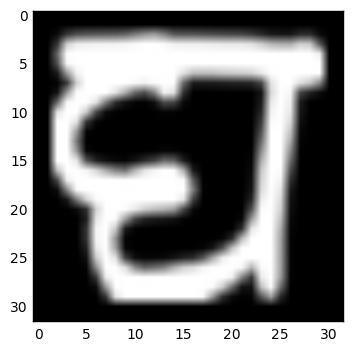

In [129]:
plt.imshow(img[89].reshape(32,32),cmap='gray')

In [132]:
img_array = np.array(img)
lbl_array = np.array(lbl)

In [133]:
img_array.shape,lbl_array.shape

((78200, 1024), (78200,))

In [134]:
# In the train folder, images of how many different classes are present?
len(set(lbl_array))

46

In [135]:
# How many total images are present in the train folder?
img_array.shape[0],lbl_array.shape[0]

(78200, 78200)

In [136]:
# Read all the images (in the train folder) and their associated labels in to two separate lists.
# While reading the images make sure that, images are in grayscale colorspace (use opencv to achieve this).
# Do all the images have a dimension of 28 by 28 pixels.
False
set(image_size)

{(32, 32, 3)}

In [137]:
# If you flatten all the images (in the train folder) and create a dataframe, 
# with each row of the dataframe representing a flattened image, then, how many columns this dataframe will have? 
img_array.shape[1]

1024

In [138]:
# How many images are there per class in train data. 
# (Each folder inside train contains images corresponding to specific devnagri alphabets or digits) 
pd.Series(lbl_array).value_counts()

character_3_ga               1700
character_20_na              1700
character_18_da              1700
character_34_chhya           1700
character_28_la              1700
character_23_ba              1700
digit_2                      1700
character_12_thaa            1700
character_24_bha             1700
digit_7                      1700
character_25_ma              1700
digit_0                      1700
character_6_cha              1700
character_32_patalosaw       1700
digit_6                      1700
character_21_pa              1700
character_29_waw             1700
digit_9                      1700
character_17_tha             1700
digit_4                      1700
character_19_dha             1700
character_14_dhaa            1700
character_16_tabala          1700
digit_5                      1700
character_9_jha              1700
character_4_gha              1700
character_36_gya             1700
character_7_chha             1700
character_27_ra              1700
character_35_t

In [139]:
unique_label = sorted(list(set(lbl_array)))
final_label = dict(zip(unique_label,list(range(46))))

In [140]:
y_label = pd.DataFrame(lbl_array)
y_label['label'] = y_label[0].map(final_label)
y_label[:5]

,0,label
0,character_20_na,11
1,character_2_kha,21
2,character_32_patalosaw,24
3,character_25_ma,16
4,character_3_ga,29


In [141]:
y_label[:2]

,0,label
0,character_20_na,11
1,character_2_kha,21


In [142]:
y_train = y_label.drop(0,axis=1)
y_train = np.array(y_train)
y_train[:5]

array([[11],
       [21],
       [24],
       [16],
       [29]], dtype=int64)

In [292]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense,Flatten
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils,to_categorical
from keras.optimizers import adam
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
import tensorflow as tf

In [293]:
# Designing Model
model = Sequential()
model.add(Conv2D(filters=6,kernel_size=(3,3),padding='same',strides=(1,1),input_shape=(32,32,1)))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2,seed=100))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',strides=(2,2)))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2,seed=100))
model.add(Conv2D(filters=24,kernel_size=(3,3),padding='same',strides=(1,1)))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2,seed=100))
model.add(Flatten())
model.add(Dense(200))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Activation('relu'))
model.add(Dropout(0.2,seed=100))
model.add(Dense(46))
model.add(Activation(tf.nn.softmax))

C:\Users\mohan.akotkar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(weights=None, epsilon=1e-06, momentum=0.9)`
C:\Users\mohan.akotkar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(weights=None, epsilon=1e-06, momentum=0.9)`
C:\Users\mohan.akotkar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(weights=None, epsilon=1e-06, momentum=0.9)`
C:\Users\mohan.akotkar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:20: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(weights=None, epsilon=1e-06, momentum=

In [145]:
x = np.array(img_array)
x = x/255.0
x.shape

(78200, 1024)

In [146]:
y = to_categorical(np.array(y_train),46)

In [287]:
y.shape,x.shape

((78200, 46), (78200, 1024))

In [294]:
adam = adam(lr = 0.001,decay=1e-6)
model.compile(loss = 'categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [295]:
X_train = x.reshape(x.shape[0],32,32,1)

In [296]:
history = model.fit(X_train,y,epochs=100,batch_size=100,validation_split=0.25)

Train on 58650 samples, validate on 19550 samples
Epoch 1/100
58650/58650 [==============================] - 279s 5ms/step - loss: 0.9538 - acc: 0.7529 - val_loss: 0.2895 - val_acc: 0.9246
Epoch 2/100
58650/58650 [==============================] - 278s 5ms/step - loss: 0.3123 - acc: 0.9130 - val_loss: 0.1522 - val_acc: 0.9587
Epoch 3/100
58650/58650 [==============================] - 282s 5ms/step - loss: 0.2027 - acc: 0.9405 - val_loss: 0.1185 - val_acc: 0.9655
Epoch 4/100
58650/58650 [==============================] - 288s 5ms/step - loss: 0.1531 - acc: 0.9540 - val_loss: 0.0927 - val_acc: 0.9723
Epoch 5/100
58650/58650 [==============================] - 279s 5ms/step - loss: 0.1221 - acc: 0.9629 - val_loss: 0.0806 - val_acc: 0.9758
Epoch 6/100
58650/58650 [==============================] - 276s 5ms/step - loss: 0.1021 - acc: 0.9687 - val_loss: 0.0858 - val_acc: 0.9730
Epoch 7/100
58650/58650 [==============================] - 286s 5ms/step - loss: 0.0846 - acc: 0.9738 - val_loss: 0.

In [297]:
os.chdir('C:\\Users\\mohan.akotkar\\Desktop\\Books\\Python\\Data Science\\ML & AI\\Neural Network\\CNN Assignment Dataset\\Data')
X_test = pd.read_csv('test_X.csv')
X_test = np.array(X_test)
X_test = X_test/255.0

In [298]:
X_test = X_test.reshape(X_test.shape[0],32,32,1)

In [299]:
y_pred = model.predict(X_test,batch_size=100)

In [312]:
y_test = []
for i in range(len(y_pred)):
    y_test.append(np.argmax(y_pred[i]))

In [313]:
y_test[:5]

[1, 19, 36, 7, 29]

In [314]:
y_predicted = pd.DataFrame(y_test,columns=['Int_Label'])
y_predicted[:5]

,Int_Label
0,1
1,19
2,36
3,7
4,29


In [315]:
reverse_dict ={v : k for k, v in final_label.items()}
y_predicted['Label'] = y_predicted['Int_Label'].map(reverse_dict)
y_predicted[:5]

,Int_Label,Label
0,1,character_11_taamatar
1,19,character_28_la
2,36,digit_0
3,7,character_17_tha
4,29,character_3_ga


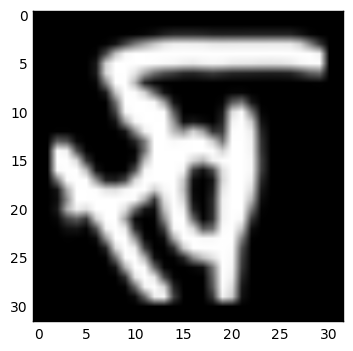

In [320]:
plt.imshow(X_test[11,:,:].reshape(32,32),cmap='gray')

In [318]:
y_predicted['Label'].to_csv('pred.csv')

In [319]:
y_predicted[10:15]

,Int_Label,Label
10,13,character_22_pha
11,21,character_2_kha
12,40,digit_4
13,5,character_15_adna
14,27,character_35_tra


In [321]:
final_label

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 